# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [105]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to change these)
city_data_to_load =(r"C:\Users\reske\Documents\PyBer_Analysis\Resources\city_data.csv")
ride_data_to_load =(r"C:\Users\reske\Documents\PyBer_Analysis\Resources\ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [106]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [107]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [108]:
#pyber_data_df = pyber_data_df.reset_index(drop=False)

In [109]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [110]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [111]:
#  4. Get the average fare per ride for each city type. 
avgfares_perride_by_city_type = total_fares_by_city_type / total_rides_by_city_type
avgfares_perride_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [112]:
# 5. Get the average fare per driver for each city type. 
avgfare_perdriver_by_city_type = total_fares_by_city_type / total_drivers_by_city_type
avgfare_perdriver_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [113]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame()

summary_df["Total Rides"] = total_rides_by_city_type
summary_df["Total Drivers"] = total_drivers_by_city_type
summary_df["Total Fares"] = total_fares_by_city_type
summary_df["Average Fare per Ride"] = avgfares_perride_by_city_type
summary_df["Average Fare per Driver"] = avgfare_perdriver_by_city_type

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [114]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None


In [115]:
#  8. Format the columns.
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:.2f}".format)

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [116]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


In [117]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_dates_count = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
type_dates_count

date            type    
1/1/2019 0:08   Urban       37.91
1/1/2019 0:46   Suburban    47.74
1/1/2019 12:32  Suburban    25.56
1/1/2019 14:40  Urban        5.42
1/1/2019 14:42  Urban       12.31
                            ...  
5/8/2019 1:54   Urban       32.69
5/8/2019 2:31   Urban       41.33
5/8/2019 4:20   Urban       21.99
5/8/2019 4:39   Urban       18.45
5/8/2019 7:29   Urban       18.55
Name: fare, Length: 2364, dtype: float64

In [125]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_dates_count = type_dates_count.reset_index()

type_dates_count

,date,type,fare
0,1/1/2019 0:08,Urban,37.91
1,1/1/2019 0:46,Suburban,47.74
2,1/1/2019 12:32,Suburban,25.56
3,1/1/2019 14:40,Urban,5.42
4,1/1/2019 14:42,Urban,12.31
...,...,...,...
2359,5/8/2019 1:54,Urban,32.69
2360,5/8/2019 2:31,Urban,41.33
2361,5/8/2019 4:20,Urban,21.99
2362,5/8/2019 4:39,Urban,18.45


In [175]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_table = pd.pivot_table(type_dates_count, values='fare', index = 'date', columns ='type')

pyber_pivot_table.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [181]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

loc_pyber_pivottable = pyber_pivot_table.loc['2019-01-01':'2019-04-29']
loc_pyber_pivottable.head(10)


type,Rural,Suburban,Urban
date,,,


In [177]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
loc_pyber_pivottable.index = pd.to_datetime(loc_pyber_pivottable.index)


In [182]:
# 7. Check that the datatype for the index is datetime using df.info()
loc_pyber_pivottable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     0 non-null      float64
 1   Suburban  0 non-null      float64
 2   Urban     0 non-null      float64
dtypes: float64(3)
memory usage: 0.0+ bytes


In [183]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
loc_pyber_pivottable_res=loc_pyber_pivottable.resample('W').sum()

loc_pyber_pivottable_res.info()

loc_pyber_pivottable_res.head(10)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

ValueError: zero-size array to reduction operation fmin which has no identity

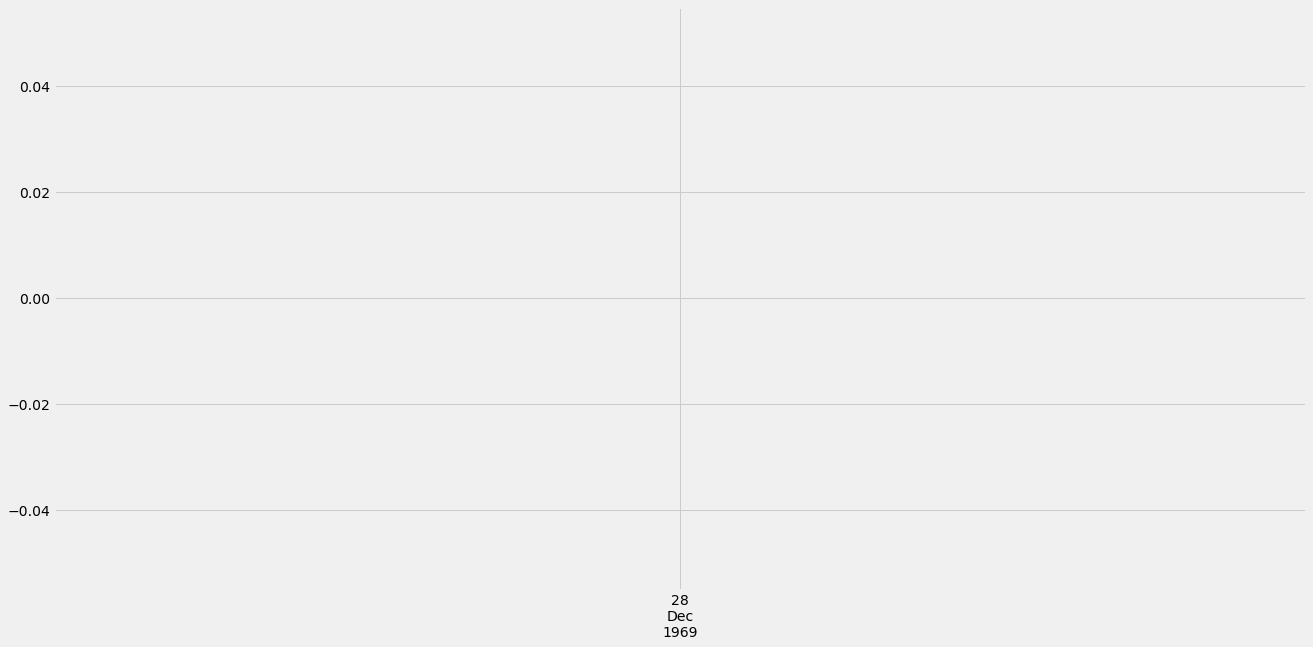

In [184]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

loc_pyber_pivottable_res.plot(figsize=(20,10))
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")

#try:
   # ax.set_ylim([y.min()-0.05, y.max()+0.05])
#except ValueError:  #raised if `y` is empty.
  #  pass
#hue=tips.time.tolist()